The main objective revolved around the identification of key metrics which contributes the most towards predicting a shopper's behavior and to suggest prioritized critical recommendations and performance improvements on the same. Revenue is the attribute of interest which identifies if a purchase was made or not.

### Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [13]:
df= pd.read_csv(r"F:\Ineuron DS\Assignment\online_shoppers_intention.csv")

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
df1 = df

In [16]:
## Checking Details Information related with Dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(12330, 18)

### EDA

In [18]:
## Checking Null Values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [19]:
# Checking for number of unique values for each feature

uniques = df.nunique(axis=0)
print(uniques)


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [20]:
# Duplicate rows

duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [21]:
df.drop_duplicates(inplace=True)

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '10297 (84%)'), Text(0, 0, '1908 (16%)')]

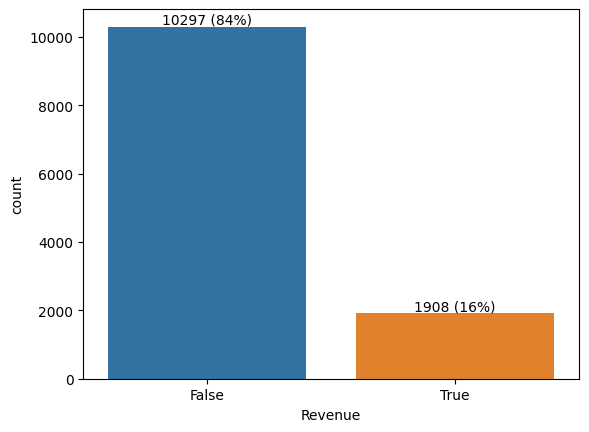

In [22]:
ax = sns.countplot(df['Revenue'])
abs_values = df['Revenue'].value_counts()
rel_values = df['Revenue'].value_counts(normalize = True).values *100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

We can see that the number of entries where the customer ended up not purchasing is much higher that the number of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online shopping ends without a purchase

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


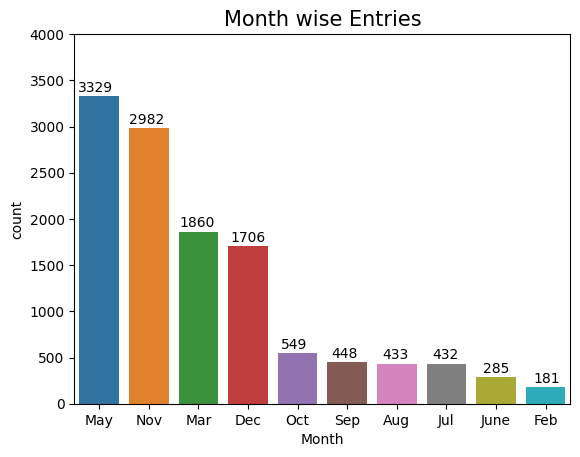

In [28]:
monthly = df['Month'].value_counts()

sns.countplot(df['Month'], order=monthly.index)
plt.title('Month wise Entries', fontsize=15)

xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02


We can see here that the 'Month' column is missing January and April. We can see visually that several months have many samples (May, Nov) and a couple have very few samples (Feb, June). We will remove this column.

Next, let us take a look at the 'OperatingSystems' and 'Browser' columns.

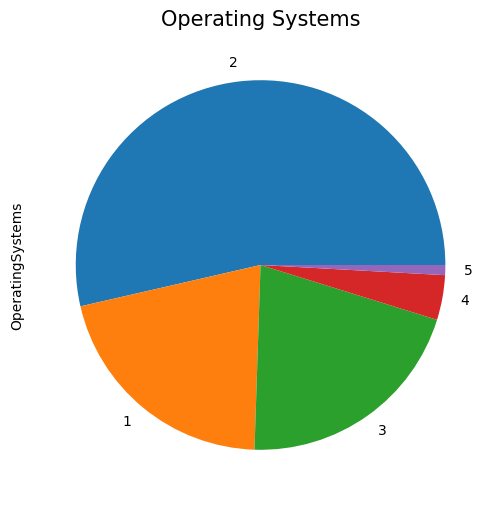

In [27]:
df['OperatingSystems'] = df['OperatingSystems'].replace([5,6,7,8],5)
os_plot = df['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Here we have the Operating Systems, labeled by number. Low-usage browsers have been consolidated into label '5'. We can see that a majority of users use operating system #2. Operating systems can indicate users of a sepcifc type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users). For now, we will forgo usage of this column for our classifier.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


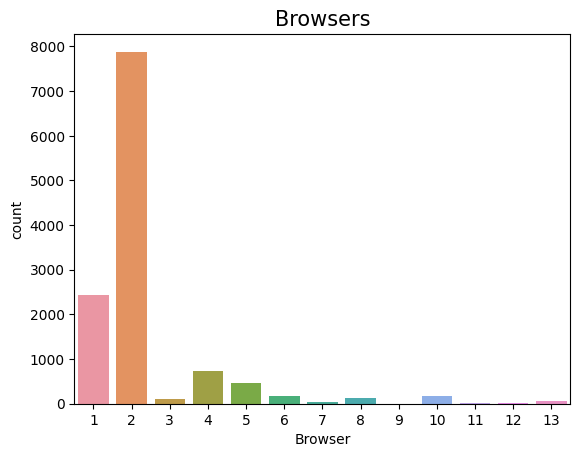

In [30]:
sns.countplot(df['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

Browser choice is even more polarizing than Operating System. Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


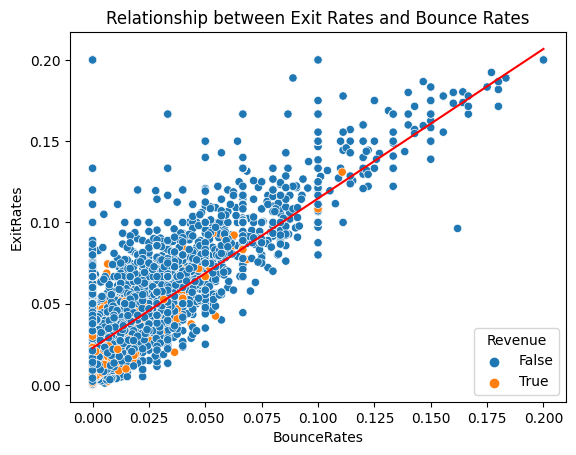

In [44]:
sns.scatterplot(df['BounceRates'], df['ExitRates'],hue = df['Revenue'])
plt.title("Relationship between Exit Rates and Bounce Rates")

z = np.polyfit(df['BounceRates'], df['ExitRates'], 1)
# get the polynomial to generate the trendline
p = np.poly1d(z)
# add trendline to the plot
plt.plot(df['BounceRates'], p(df['BounceRates']), color = 'red')

The following figure depicts that most of the customers whether they drive in revenue or not, are returning customers, suggesting that the firm has dealt with good retention with customers.

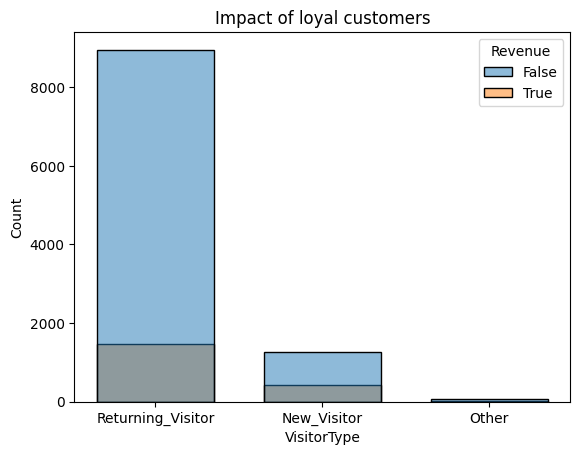

In [150]:
sns.histplot(
    x=df["VisitorType"], hue=df["Revenue"],
    multiple="layer", stat="count",
    discrete=True, shrink=.7
)

plt.title("Impact of loyal customers")
plt.show()

The following figure depicts that most of the customers whether they drive in revenue or not, are returning customers, suggesting that the firm has dealt with good retention with customers.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


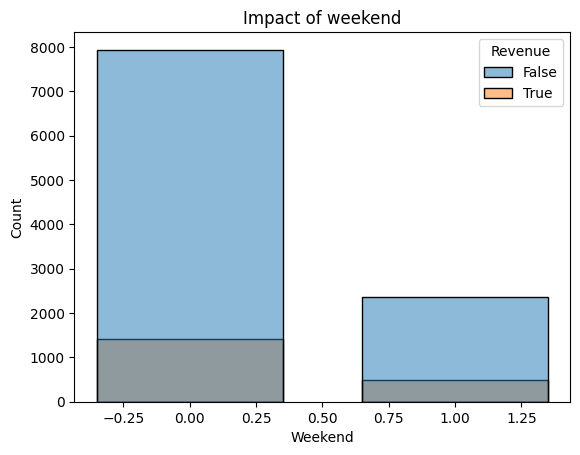

In [151]:
sns.histplot(
    x=df["Weekend"], hue=df["Revenue"],
    multiple="layer", stat="count",
    discrete=True, shrink=.7
)

plt.title("Impact of weekend")
plt.show()

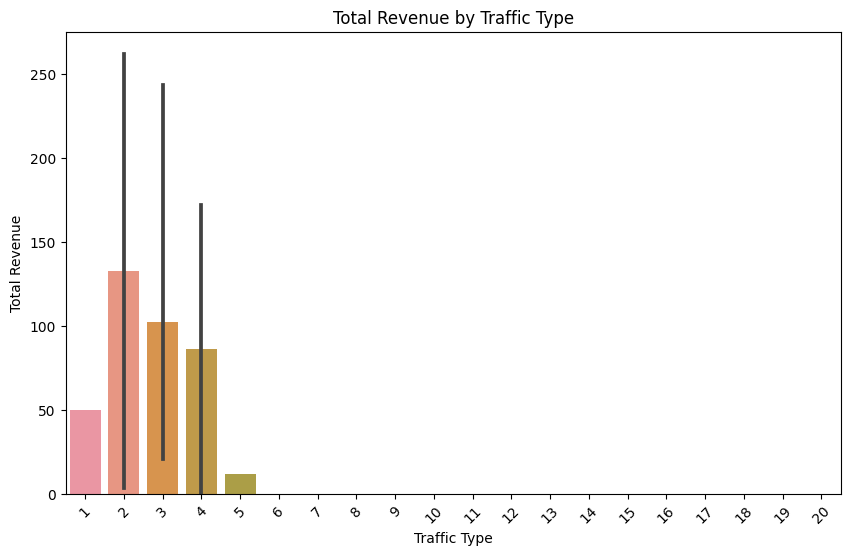

In [177]:
# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Traffic Type 2 and Traffic Type 3 generate the highest total revenue, indicating that these two traffic sources are driving the most valuable traffic to the website.
It is important to focus on optimizing and maximizing the traffic from Traffic Type 2 and Traffic Type 3, as they have shown to be the most valuable sources of revenue for the website

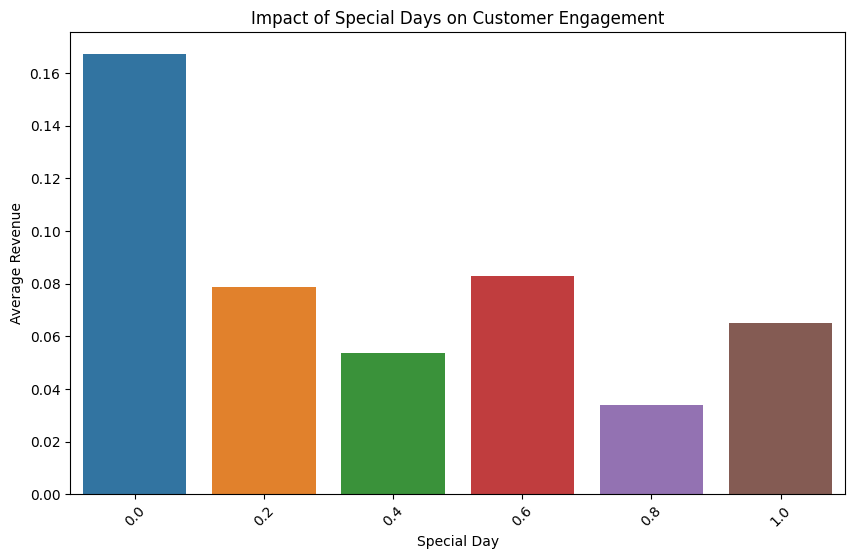

In [178]:
# Group the data by 'SpecialDay' and calculate the average revenue or visitor count

special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean() 

special_day_analysis = special_day_analysis.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" ) 
plt.xticks(rotation=45)
plt.show()

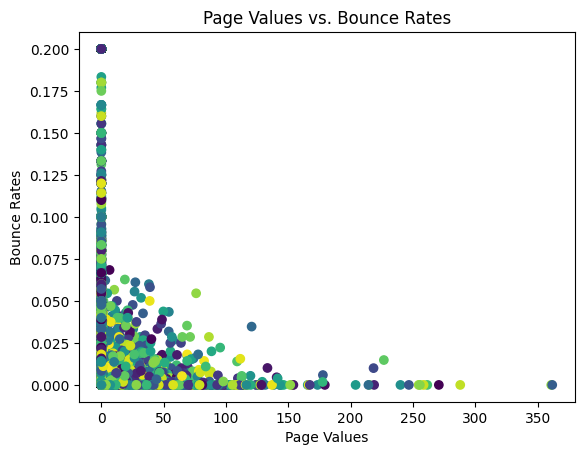

In [181]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

We can observe that there is a general trend where higher page values tend to have lower bounce rates. This could indicate that users are more likely to stay on a website if the page provides them with more valuable information or products. However, there are also many data points with low page values and low bounce rates, suggesting that there may be other factors at play as well.

<Axes: >

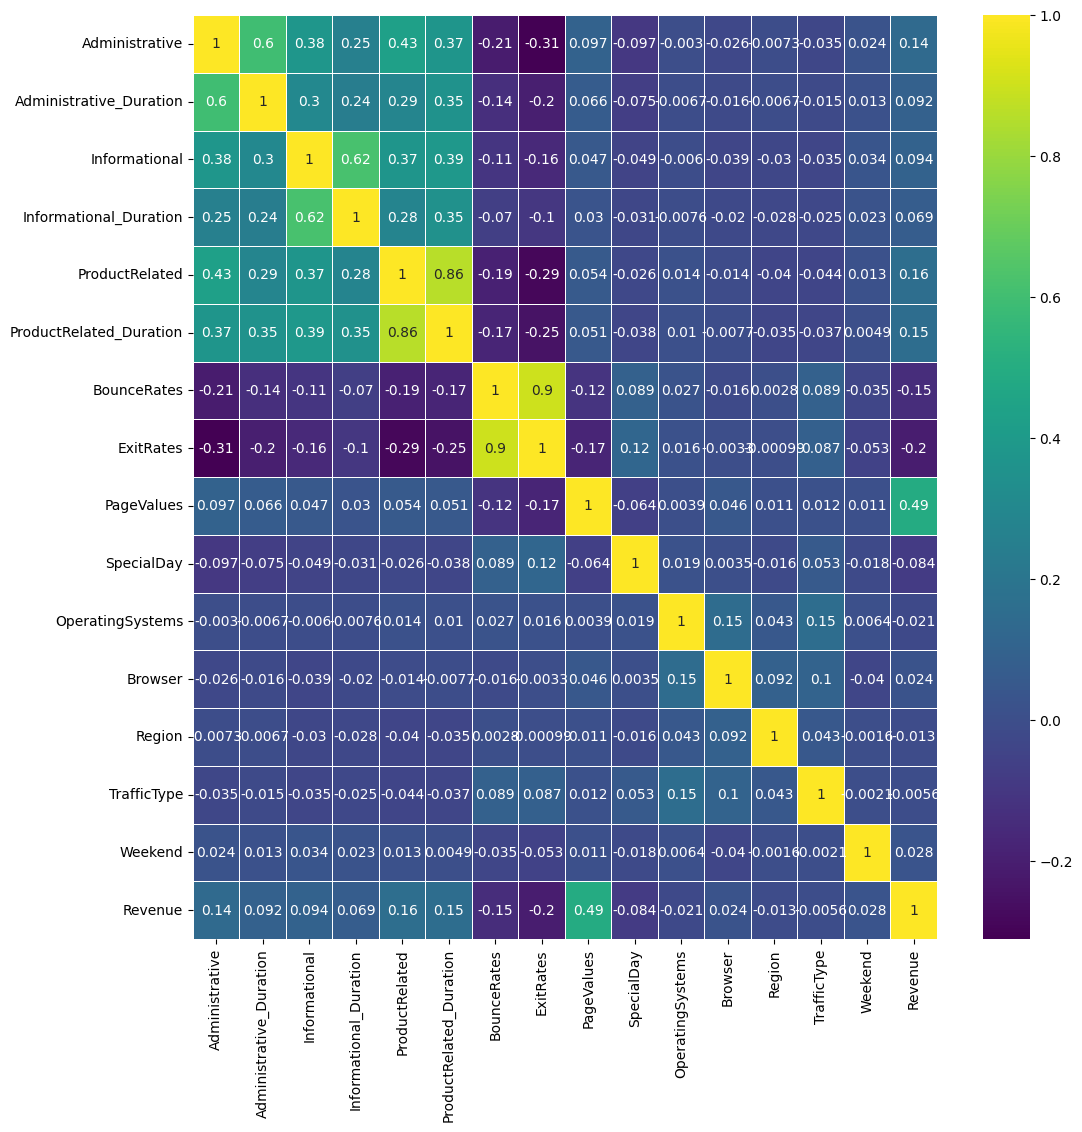

In [182]:
# Correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

From the above correlation matrix of the online shopper dataset, we can observe that:

The 'ExitRates' and 'BounceRates' features are moderately correlated, which makes sense as both are related to the visitor leaving the website.

The 'PageValues' feature is weakly correlated with the other features, which suggests that it may not have a strong impact on predicting whether a visitor will make a purchase or not.